### Project : Sepsis prediction BEFORE 12 Hrs

Subject : Machine Learning

In [1]:
import pandas as pd

In [2]:
#Import path of file in your machine.
path="C:\\Users\\Ronak\\OneDrive\\Desktop\\AIDS_Subjects\\Machine_Learning\\ML_Assingment\\SepsisModified.csv"

In [3]:
#Defining Function to open file
def opencsv(path1):
    df=pd.read_csv(path1)
    return df

In [4]:
df=opencsv(path)
df
# Let's have first look at our DataFrame=df

,Sr.No,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,51,58.0,92.0,NaN,103.0,76.0,54.0,16.0,NaN,...,NaN,NaN,51.00,0,0.0,1.0,-324.60,52,0,111711
1048571,1048571,52,56.0,92.0,NaN,95.0,69.0,50.0,19.0,NaN,...,NaN,NaN,51.00,0,0.0,1.0,-324.60,53,0,111711
1048572,1048572,53,61.0,95.0,37.7,103.0,77.0,56.0,20.0,NaN,...,NaN,NaN,51.00,0,0.0,1.0,-324.60,54,0,111711
1048573,1048573,54,59.0,95.5,NaN,99.0,72.0,56.0,22.5,NaN,...,NaN,NaN,51.00,0,0.0,1.0,-324.60,55,0,111711


In [5]:
df.info()
# Again to get idea of all available featurs, their datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Sr.No             1048575 non-null  int64  
 1   Hour              1048575 non-null  int64  
 2   HR                956353 non-null   float64
 3   O2Sat             916891 non-null   float64
 4   Temp              354442 non-null   float64
 5   SBP               892370 non-null   float64
 6   MAP               929498 non-null   float64
 7   DBP               632209 non-null   float64
 8   Resp              916890 non-null   float64
 9   EtCO2             18587 non-null    float64
 10  BaseExcess        82955 non-null    float64
 11  HCO3              64040 non-null    float64
 12  FiO2              118069 non-null   float64
 13  pH                96427 non-null    float64
 14  PaCO2             75091 non-null    float64
 15  SaO2              44080 non-null    float64
 16  

In [6]:
# ICULOS is one of the most important feature
# If the patient is getting sepsis then consider following for him/her.
# For those patient for which ICULOS it becomes 1 from 0 are shown below.
# These are critical rows for us as they are getting sepsis from here, We should focus & think on it!
df[df['SepsisLabel']==1].groupby('Patient_ID').first()

,Sr.No,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,
9,470491,248,119.0,100.0,37.94,140.0,106.0,85.0,26.5,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,249,1
11,32857,24,98.0,100.0,37.67,147.0,86.0,59.0,18.5,NaN,...,10.6,NaN,184.0,65.79,1,NaN,NaN,-0.02,26,1
15,507265,5,86.0,NaN,37.10,107.0,83.0,69.0,10.0,NaN,...,17.7,NaN,102.0,58.54,0,NaN,NaN,-405.34,6,1
18,140179,125,105.0,96.0,37.83,108.0,75.0,59.0,20.0,NaN,...,11.7,NaN,701.0,39.28,1,1.0,0.0,-0.02,126,1
22,33645,9,73.0,97.0,NaN,117.0,65.0,44.0,14.0,NaN,...,20.2,NaN,148.0,77.26,0,0.0,1.0,-135.81,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119813,1005386,30,85.0,97.0,38.00,161.0,104.0,79.0,25.0,NaN,...,8.0,420.0,190.0,54.00,1,1.0,0.0,-4.79,31,1
119822,946056,122,101.0,92.0,36.80,143.0,91.0,67.0,26.0,NaN,...,12.2,NaN,39.0,71.00,0,0.0,1.0,-36.68,123,1
119854,793503,0,96.0,95.0,36.60,116.0,90.0,75.5,22.5,NaN,...,NaN,NaN,NaN,50.00,0,1.0,0.0,-1.21,1,1


In [7]:
# Following is dict of patients where key represents the patient id & value represents value of ICULOS 
# from which ICULOS becomes 1 from 0

patientSepsisDetected=dict(zip(list(df[df['SepsisLabel']==1].groupby('Patient_ID').first().index) , list(df[df['SepsisLabel']==1].groupby('Patient_ID').first()['ICULOS'])))
patientSepsisDetected

# Key: Patient_id, Value: From which ICULOS becomes 1 from 0

{9: 249,
 11: 26,
 15: 6,
 18: 126,
 22: 14,
 28: 22,
 34: 6,
 42: 64,
 53: 18,
 56: 1,
 58: 1,
 63: 5,
 64: 21,
 78: 95,
 141: 52,
 161: 14,
 171: 61,
 178: 89,
 185: 56,
 188: 76,
 203: 73,
 206: 15,
 211: 2,
 226: 10,
 260: 1,
 265: 55,
 272: 91,
 283: 34,
 286: 85,
 311: 90,
 324: 55,
 346: 56,
 354: 3,
 357: 138,
 359: 35,
 371: 3,
 373: 141,
 376: 35,
 379: 51,
 384: 2,
 401: 205,
 403: 1,
 466: 43,
 468: 84,
 483: 20,
 524: 1,
 541: 242,
 545: 1,
 559: 42,
 574: 69,
 584: 2,
 587: 245,
 601: 84,
 614: 21,
 616: 3,
 635: 108,
 639: 63,
 650: 49,
 653: 29,
 654: 8,
 656: 35,
 674: 74,
 679: 65,
 698: 22,
 702: 63,
 705: 9,
 714: 12,
 728: 1,
 730: 5,
 754: 101,
 762: 152,
 765: 54,
 772: 70,
 784: 24,
 795: 130,
 811: 3,
 818: 14,
 847: 72,
 851: 6,
 872: 8,
 890: 73,
 897: 213,
 938: 45,
 939: 66,
 962: 24,
 967: 30,
 972: 9,
 983: 34,
 996: 7,
 999: 5,
 1040: 207,
 1043: 73,
 1069: 146,
 1072: 55,
 1084: 6,
 1086: 37,
 1088: 25,
 1092: 58,
 1118: 1,
 1123: 90,
 1128: 12,
 1133: 

In [8]:
# Our aim is to detect Sepsis before one get it. Aim is divided into 3 parts
#  Aim is divided into 3 parts
# 1.We have to predict that one will get sepsis within/after 6 hours 
# 2.We have to predict that one will get sepsis within/after next 12 hours 
# 3.We have to predict that one will get sepsis before 12 hours

In [9]:
# In order to achieve above goal we have RE-LABLED "SepsisLabel" data into following parts.
# SepsisLable:
# 0: Never had sepsis during entire time of ICULOS
# 1: Sepsis Detected during sometime of ICULOS
# 6: Patient will get sepsis within/after 6 hours 
# 12:Patient will get sepsis between next 6 to 12 hrs
# 14:Patient will get sepsis after 12 hrs

In [10]:
# To relable SepsisLable we have following code, We have to run "Sepsis.csv" file & re lable it.
# Since it takes almost 30 mins to run we have already done it & created one more file called "SepsisModified.csv"
# Which is current file,we have imported SepsisModified.csv file to save our time.

# Although code to create "SepsisModified.csv" from "Sepsis.csv" is as following.
# You may check & try!!!

In [11]:
# %time
# for key,value in patientSepsisDetected.items():
#         for j in range(value-6,value):
#             mask1=(df['Patient_ID']==key) & (df['ICULOS']==j)
#             df.loc[mask1,'SepsisLabel']=6
#         for k in range(value-12,value-6):
#             mask2=(df['Patient_ID']==key) & (df['ICULOS']==k)
#             df.loc[mask2,'SepsisLabel']=12
#         for l in range(1,value-12):
#             mask3=(df['Patient_ID']==key) & (df['ICULOS']==l)
#             df.loc[mask3,'SepsisLabel']= 14

In [12]:
# Let's check if Re-labled done or is there any error!
# Check for 6 & 12 in ICULOS
df[df['Patient_ID']==11]
# We'll now give these data to train model, as our purpose is to predict 6 or 12 which will fullfilled here.

# We can see ReLabaling is done successfully! Bingo!!

,Sr.No,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
32833,32833,0,81.0,100.0,NaN,NaN,NaN,NaN,12.5,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,2,14,11
32834,32834,1,82.0,100.0,38.00,136.5,90.0,71.0,12.0,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,3,14,11
32835,32835,2,81.0,100.0,38.11,114.0,87.0,61.0,12.0,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,4,14,11
32836,32836,3,82.0,100.0,NaN,114.0,79.0,62.0,12.0,NaN,...,NaN,225.0,65.79,1,NaN,NaN,-0.02,5,14,11
32837,32837,4,84.0,100.0,NaN,117.0,79.0,61.0,16.0,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,6,14,11
32838,32838,5,84.0,100.0,NaN,103.0,73.5,58.0,20.0,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,7,14,11
32839,32839,6,85.0,100.0,38.17,123.0,72.0,66.0,18.0,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,8,14,11
32840,32840,7,85.0,100.0,NaN,143.0,96.0,72.0,14.0,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,9,14,11
32841,32841,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,10,14,11
32842,32842,9,79.0,100.0,NaN,146.0,93.0,63.0,12.0,NaN,...,NaN,NaN,65.79,1,NaN,NaN,-0.02,11,14,11


In [13]:
# saving the dataframe
# df.to_csv('SepsisModified.csv')
# Saving above file as seperate csv file so that it won't take that long every time.

In [14]:
# Now we'll work on this file & train our models on this dataset so that we can achieve our AIM which explained earlier!

### Exploratory Data Analysis

In [15]:
#Fiding % Of NA's In Each Feature
df.isna().sum(axis = 0).sort_values(ascending=False) / len(df) * 100

Bilirubin_direct    99.830913
TroponinI           99.468231
Fibrinogen          99.279975
Bilirubin_total     98.641585
Alkalinephos        98.467444
AST                 98.441885
EtCO2               98.227404
Lactate             96.940705
PTT                 96.105667
SaO2                95.796200
Phosphate           95.472236
Calcium             94.562048
HCO3                93.892664
Platelets           93.770593
Creatinine          93.636602
Chloride            93.583006
WBC                 93.042176
Magnesium           92.953103
PaCO2               92.838757
BUN                 92.494862
BaseExcess          92.088787
Hgb                 91.901295
pH                  90.803996
Potassium           89.904299
Hct                 89.693632
FiO2                88.740052
Glucose             85.352121
Temp                66.197745
Unit2               44.005722
Unit1               44.005722
DBP                 39.707794
SBP                 14.896884
Resp                12.558472
O2Sat     

In [16]:
#Finding Unique Values In Each Feature
df.nunique()

Sr.No               1048575
Hour                    336
HR                      339
O2Sat                   144
Temp                    622
SBP                     876
MAP                     930
DBP                     532
Resp                    221
EtCO2                   127
BaseExcess              285
HCO3                    216
FiO2                     96
pH                      101
PaCO2                   427
SaO2                    337
AST                    1702
BUN                     234
Alkalinephos            657
Calcium                 429
Chloride                104
Creatinine             1076
Bilirubin_direct        208
Glucose                1018
Lactate                1051
Magnesium               101
Phosphate               174
Potassium               341
Bilirubin_total         373
TroponinI              1303
Hct                     681
Hgb                     312
PTT                    1322
WBC                     769
Fibrinogen              789
Platelets           

In [17]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sr.No,1048575.0,524287.000000,302697.673593,0.00,262143.50,524287.00,786430.50,1048574.00
Hour,1048575.0,25.408382,28.238308,0.00,9.00,19.00,33.00,335.00
HR,956353.0,84.870313,17.172201,20.00,73.00,84.00,96.00,280.00
O2Sat,916891.0,97.228627,2.926971,20.00,96.00,98.00,99.50,100.00
Temp,354442.0,37.003726,0.776637,20.90,36.50,37.00,37.50,50.00
SBP,892370.0,122.392746,22.490689,20.00,106.00,120.00,136.50,300.00
MAP,929498.0,80.578177,15.804974,20.00,69.67,79.00,90.00,300.00
DBP,632209.0,62.218458,13.517029,20.00,53.00,60.50,70.00,300.00
Resp,916890.0,18.754969,5.260591,1.00,15.00,18.00,22.00,100.00
EtCO2,18587.0,33.385834,8.238420,10.00,29.00,33.00,38.00,100.00


1) Many of the features have a high percentage of missing values, with Bilirubin_direct missing as much as 97%. It is possible that these rare values were only measured in cases where some kind of abnormality was expected. 2) There are also a number of negative values in the HospAdmTime feature, which may indicate that the patient was first admitted to the ICU and then later released to a hospital. Positive values, on the other hand, may indicate that the patient was admitted to the ICU after spending time in a hospital. 3) It should be noted that septic patients make up only 7% of the total dataset, which should be taken into account when selecting a model."

In [18]:
df["SepsisLabel"].value_counts()

0     919196
14     88698
1      20808
6      10672
12      9201
Name: SepsisLabel, dtype: int64

### Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Now we should split the data into train and test data and put test data aside until we have a trained model

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("SepsisLabel", axis=1), df["SepsisLabel"], test_size=0.2, random_state=42)

In [21]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

#### Visualizing Vital Signs

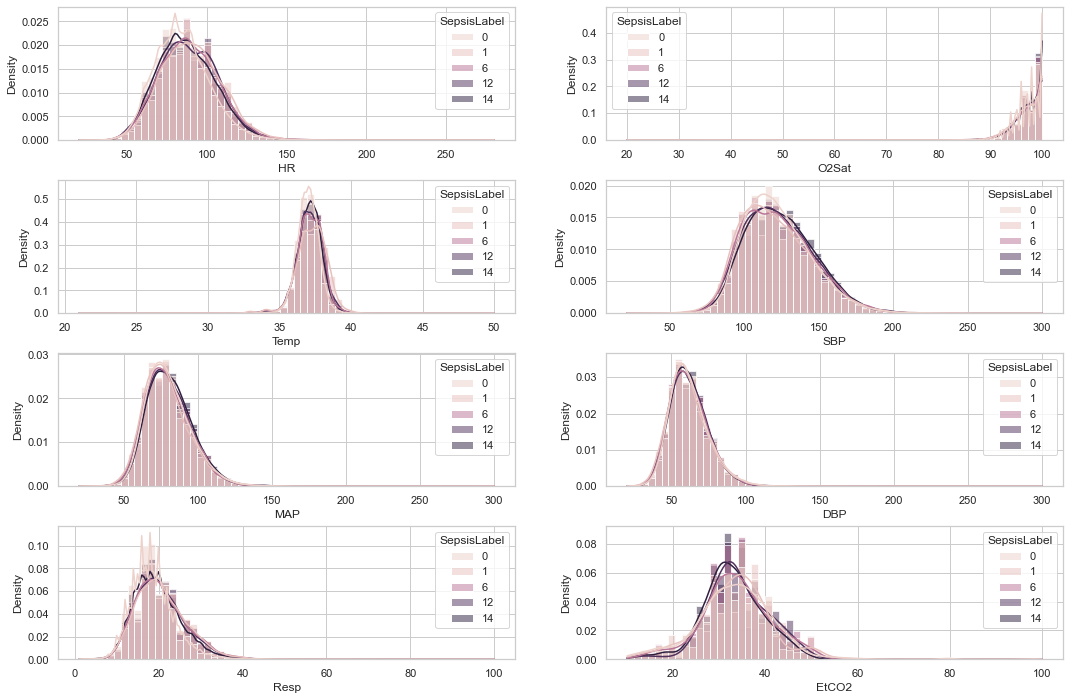

In [22]:
#X_train.columns

# Visualizing Vital Signs

vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)
    
#plt.savefig("vital_signs.png", dpi=400)

Observations

Vital signs:

1) Resp, EtCO2, and HR has different characteristic between septic and non-septic patients.

#### Visualizing Lab Values

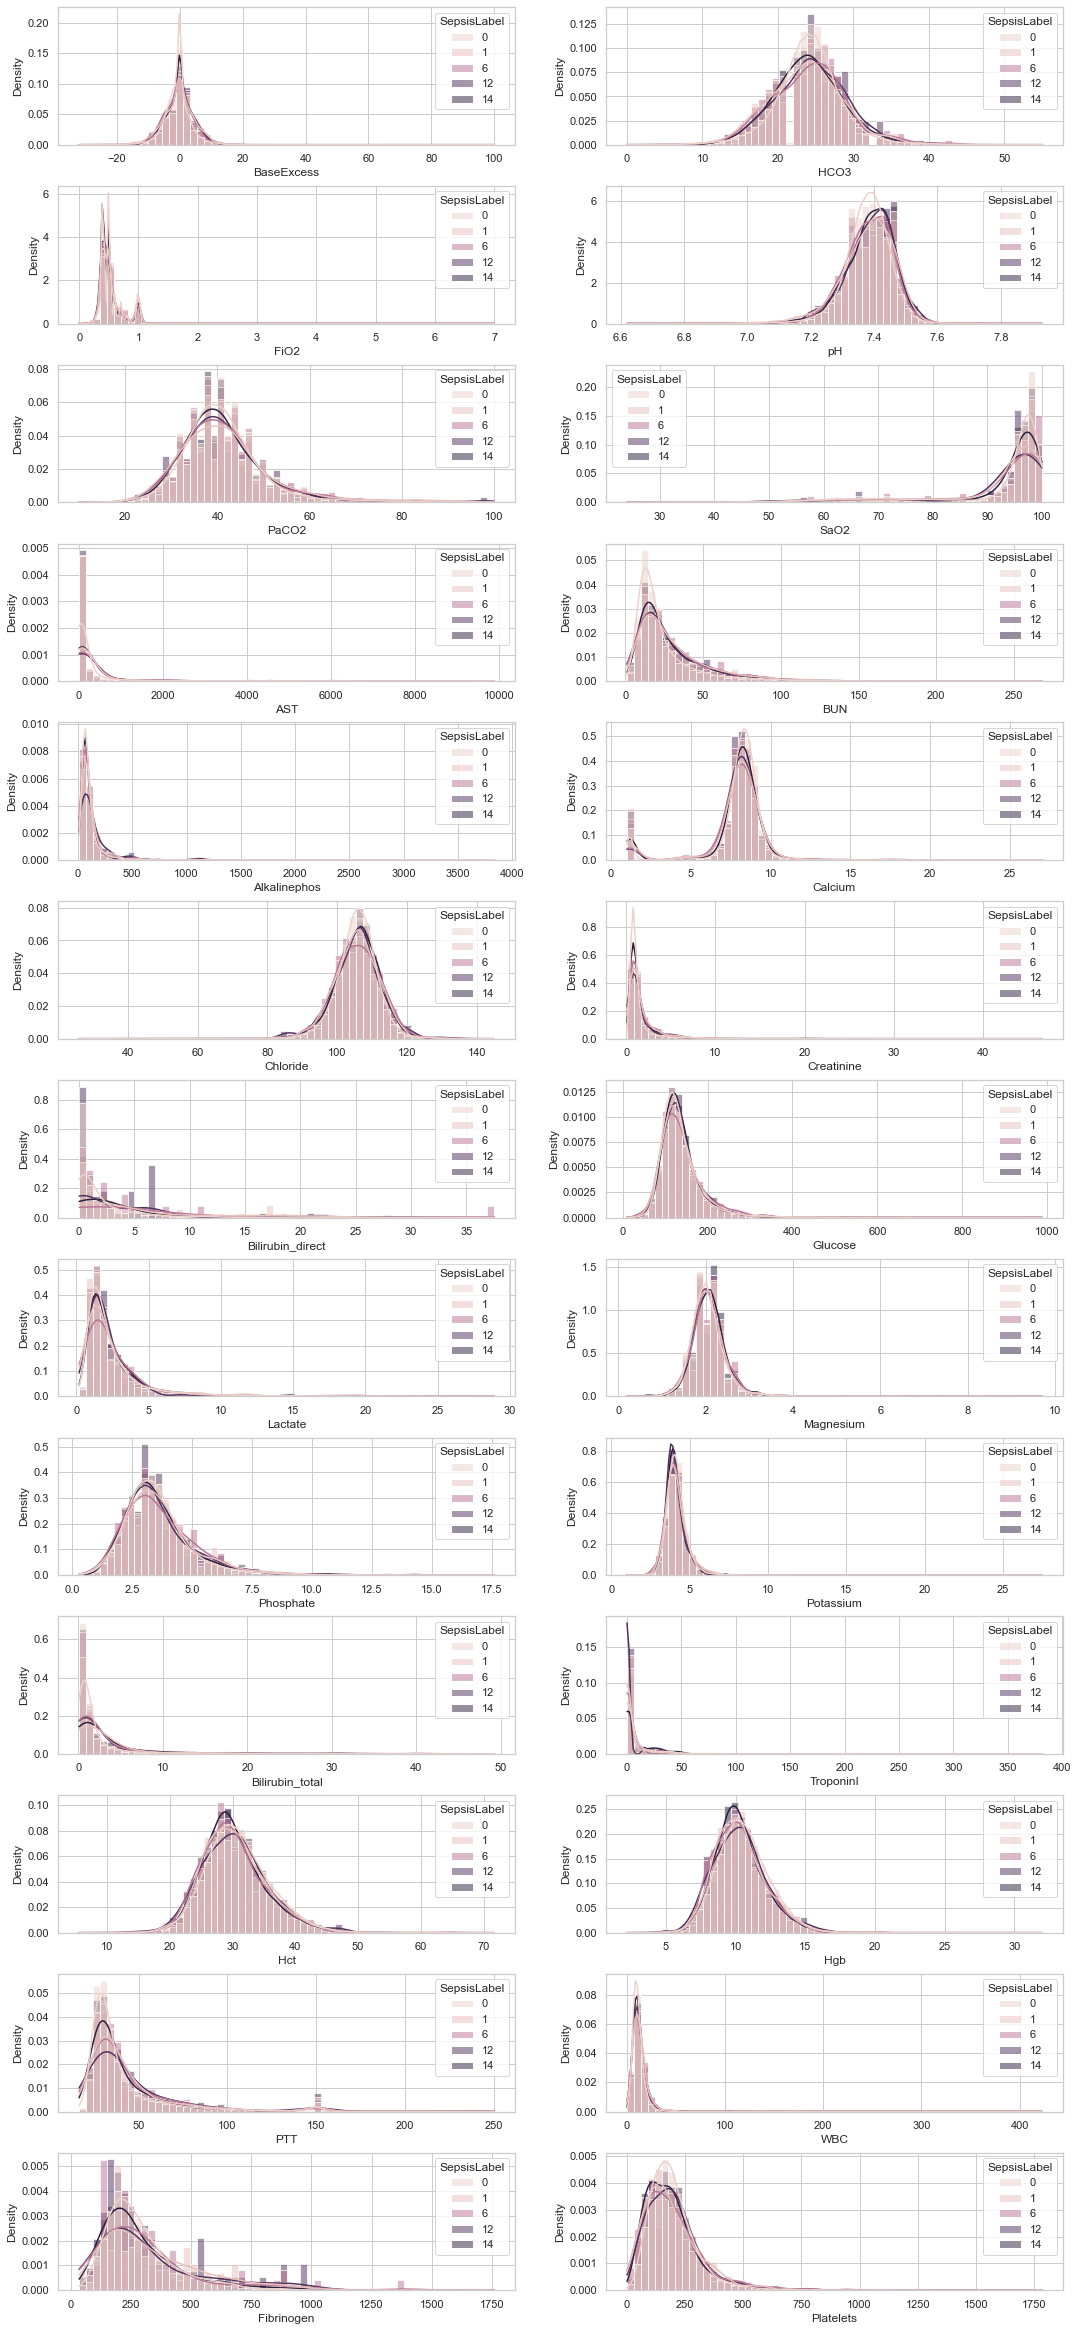

In [23]:
# Visualizing Lab Values

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("lab_values.png", dpi=400)

#### Observations
Laboratory Values:

1) BaseExcess appears to deviate higher from the mean for septic patients indicating that this might be a good feature to correlate with sepsis patients.
2) Similary, PH is higer in when Sepsis is about to happen in 6 or 12 hours.
3) BUN is pervelant in patients in 6-12 hours duation but there is no sign in early hours making it a good feature for sepsis.
4) Bilirubin_direct is high in Sepsis patients but it is very much present in patients in early hours.
5) Hct and Hgb values are not pervalnet earlier, but they grow in values as patient become comes close to developing Sepsis.
6) Septic patients may have slightly lower concantrations of Platelets.
7) Calcium concentration, although similar for septic and non-septic patients, has outliers for septic patients at very low concentrations. We may want to investigate this further

#### Visualizing Demographics

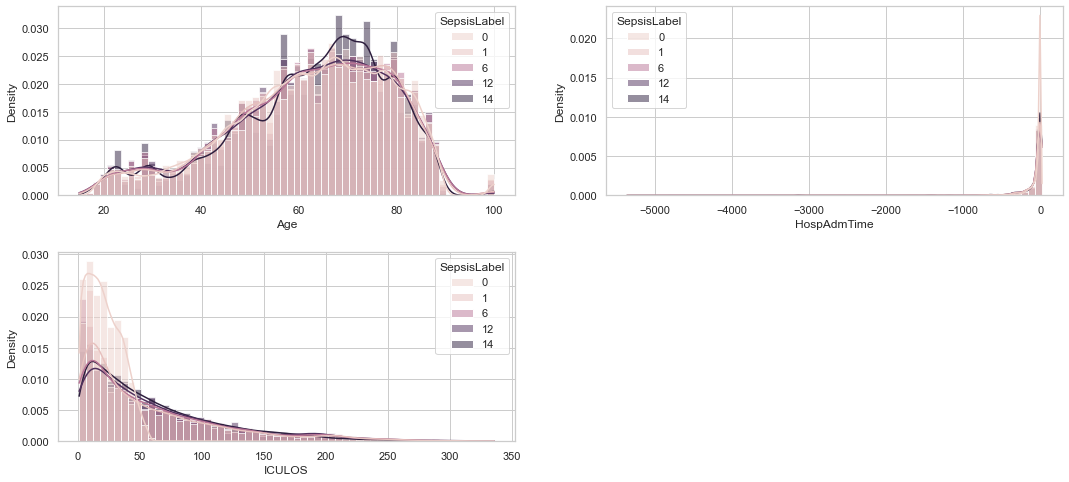

In [24]:
#X_train.columns

#Visualizing Demographics

demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)

#### Observations
Demographic Values:

1) Patients that stayed at ICU longer have had higher chances of eventually developing sepsis.
2) No differnce in Age between septic and non-septic patients.
3) Patients that didn't have a record of ICU unit were likely assigned to other ICU than SICU and MICU (e.g. Cardiac ICU, Trauma ICU etc.) as all the patients have a record of time spent in ICU (ICULOS attributte).

In [25]:
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"
    
    sns.countplot(x=gender, hue=y_train, dodge=False)    

    
def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])
    
    sns.barplot(x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

C:\Users\Ronak\AppData\Local\Temp\ipykernel_70360\1375138790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[gender==0] = "female"


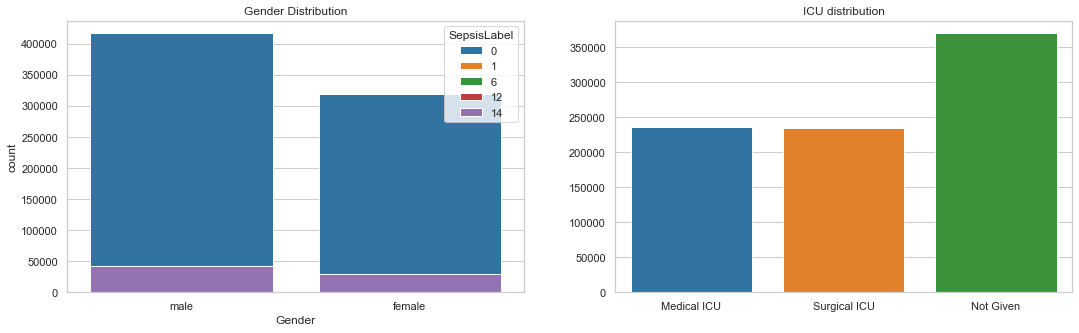

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])   
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

Let's see if the type of ICU that a patient is treated in is related to chances of developing a sepsis:

In [27]:
import numpy as np
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}
    
    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]
    
    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100
        
    return shares


IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

<AxesSubplot:ylabel='Developed Sepsis (%)'>

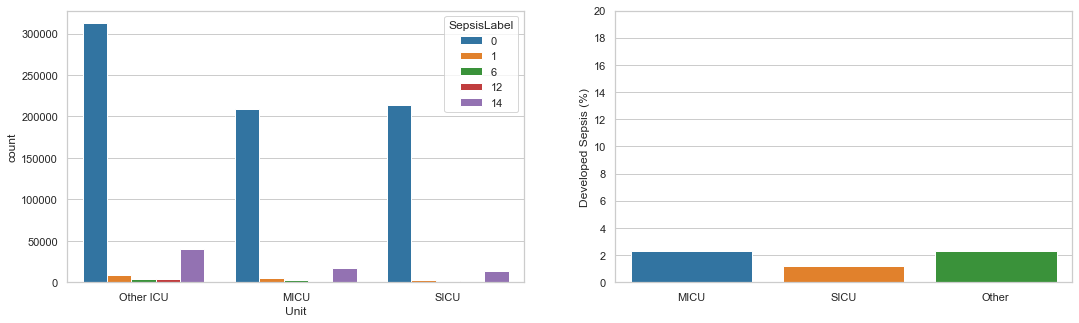

In [28]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(data=CombineUnits(X_train.copy()), x="Unit", hue=y_train)
plt.subplot(1,2,2)
plt.ylim([0,20])
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x=list(IsSeptic_shares.keys()), y=list(IsSeptic_shares.values()))

Not by much, but patients treated in surgical ICU had lower probability of developing sepsis. This feature may be useful for our model.

In [29]:
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

chi_sq_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'ICULOS']

X_chi = X_train[chi_sq_cols].copy()
#print(len(X_chi.columns))

imputer = SimpleImputer(strategy="mean")
X_chi = imputer.fit_transform(X_chi)
X_chi = np.abs(X_chi)

#print(type(X_chi), X_chi.shape)

chis = chi2(X_chi, y_train)

#print(len(chi_sq_cols))
#print(chis[0], len(chis[0]))

#print (type(chis), chis, chis.shape)
chis[0].reshape(len(chi_sq_cols),1)

chi_dict = {}
p_dict = {}
for i in range(len(chi_sq_cols)-1):
    chi_dict[chi_sq_cols[i]] = chis[0][i]
    p_dict[chi_sq_cols[i]] = chis[1][i]

In [30]:
chi_dict

{'HR': 13481.975226745864,
 'O2Sat': 32.957988954277276,
 'Temp': 6.652796616991066,
 'SBP': 2069.417909144432,
 'MAP': 1272.3523802789873,
 'DBP': 143.59048145645363,
 'Resp': 8289.813603833092,
 'EtCO2': 0.8361884580340438,
 'HCO3': 1.270449077914088,
 'FiO2': 1.457413974314726,
 'pH': 0.009169541965564621,
 'PaCO2': 6.087971796863466,
 'SaO2': 2.2085021337593838,
 'AST': 416.70412354450434,
 'BUN': 1155.3886547358616,
 'Alkalinephos': 27.829579168004017,
 'Calcium': 4.4964307278253814,
 'Chloride': 0.12987938786209047,
 'Creatinine': 9.219543616889045,
 'Bilirubin_direct': 1.0520891224396611,
 'Glucose': 31.32687926720672,
 'Lactate': 1.1934628495929145,
 'Magnesium': 0.6675094727886646,
 'Phosphate': 0.6721074933448371,
 'Potassium': 1.280880416971579,
 'Bilirubin_total': 31.088438554962003,
 'TroponinI': 1.5126204562958687,
 'Hct': 15.657656251592323,
 'Hgb': 4.809228693397271,
 'PTT': 33.39230718985262,
 'WBC': 49.527513161686215,
 'Fibrinogen': 19.810045294644645,
 'Platelets': 

In [31]:
p_dict

{'HR': 0.0,
 'O2Sat': 1.2183724676492501e-06,
 'Temp': 0.15541397559603637,
 'SBP': 0.0,
 'MAP': 3.284359158658143e-274,
 'DBP': 4.806468620983413e-30,
 'Resp': 0.0,
 'EtCO2': 0.9335317068123475,
 'HCO3': 0.8663689591367534,
 'FiO2': 0.834157317461193,
 'pH': 0.9999895220065075,
 'PaCO2': 0.19267410656882997,
 'SaO2': 0.6974730174053383,
 'AST': 6.834811185083925e-89,
 'BUN': 7.464326409367436e-249,
 'Alkalinephos': 1.3505193081125253e-05,
 'Calcium': 0.34297091299082855,
 'Chloride': 0.9979805201092319,
 'Creatinine': 0.05584017058778776,
 'Bilirubin_direct': 0.9017973717391565,
 'Glucose': 2.625543705209232e-06,
 'Lactate': 0.8791737398805067,
 'Magnesium': 0.9552743888700795,
 'Phosphate': 0.9547235633906298,
 'Potassium': 0.8646110011445733,
 'Bilirubin_total': 2.9368219665260158e-06,
 'TroponinI': 0.824403585271599,
 'Hct': 0.003514683378303226,
 'Hgb': 0.30743774288600856,
 'PTT': 9.92730817229382e-07,
 'WBC': 4.5315455834501775e-10,
 'Fibrinogen': 0.000544414762313551,
 'Platele

P-values indicate the likelihood that the null hypothesis, which states that there is no relationship between a feature and the target label, is true. In feature selection, a commonly used p-value threshold is 95%. This means that features with a p-value higher than 0.05 do not significantly contribute to the relationship between the feature and target label, and can be excluded from the analysis.

These features are:
Hgb,
TroponinI,
Potassium,
Phosphate,
Magnesium,
Lactate,
Bilirubin_direct,
Chloride,
SaO2,
PaCO2,
pH,
HCO3,
EtCO2

Other than that we can see that pH and PaCO2 violate null-hypothesis. We mentioned that these features may predict acid-base disturbances in patients. However, since we have BaseExcess feature pH becomes rudimentary, however we can still use PaCO2 to find out wheter a patient has metabolic or respiratory disturbance.

In [32]:
df['ICULOS'].unique()
# Hence we have from 1 to 336 Hours at max for 'ICULOS'

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [33]:
# Let's create list of all columns available in dataframe
columns=list(df.columns)

In [34]:
# Remove target feature from above list
columns.remove('SepsisLabel')

In [35]:
# Creating function for corr_matrix.
import matplotlib.pyplot as plt
def corrmatrix(dataset):    
    import seaborn as sns
    corrmat=dataset.corr()
    top_corr_features=corrmat.index
    plt.figure(figsize=(40,40))
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

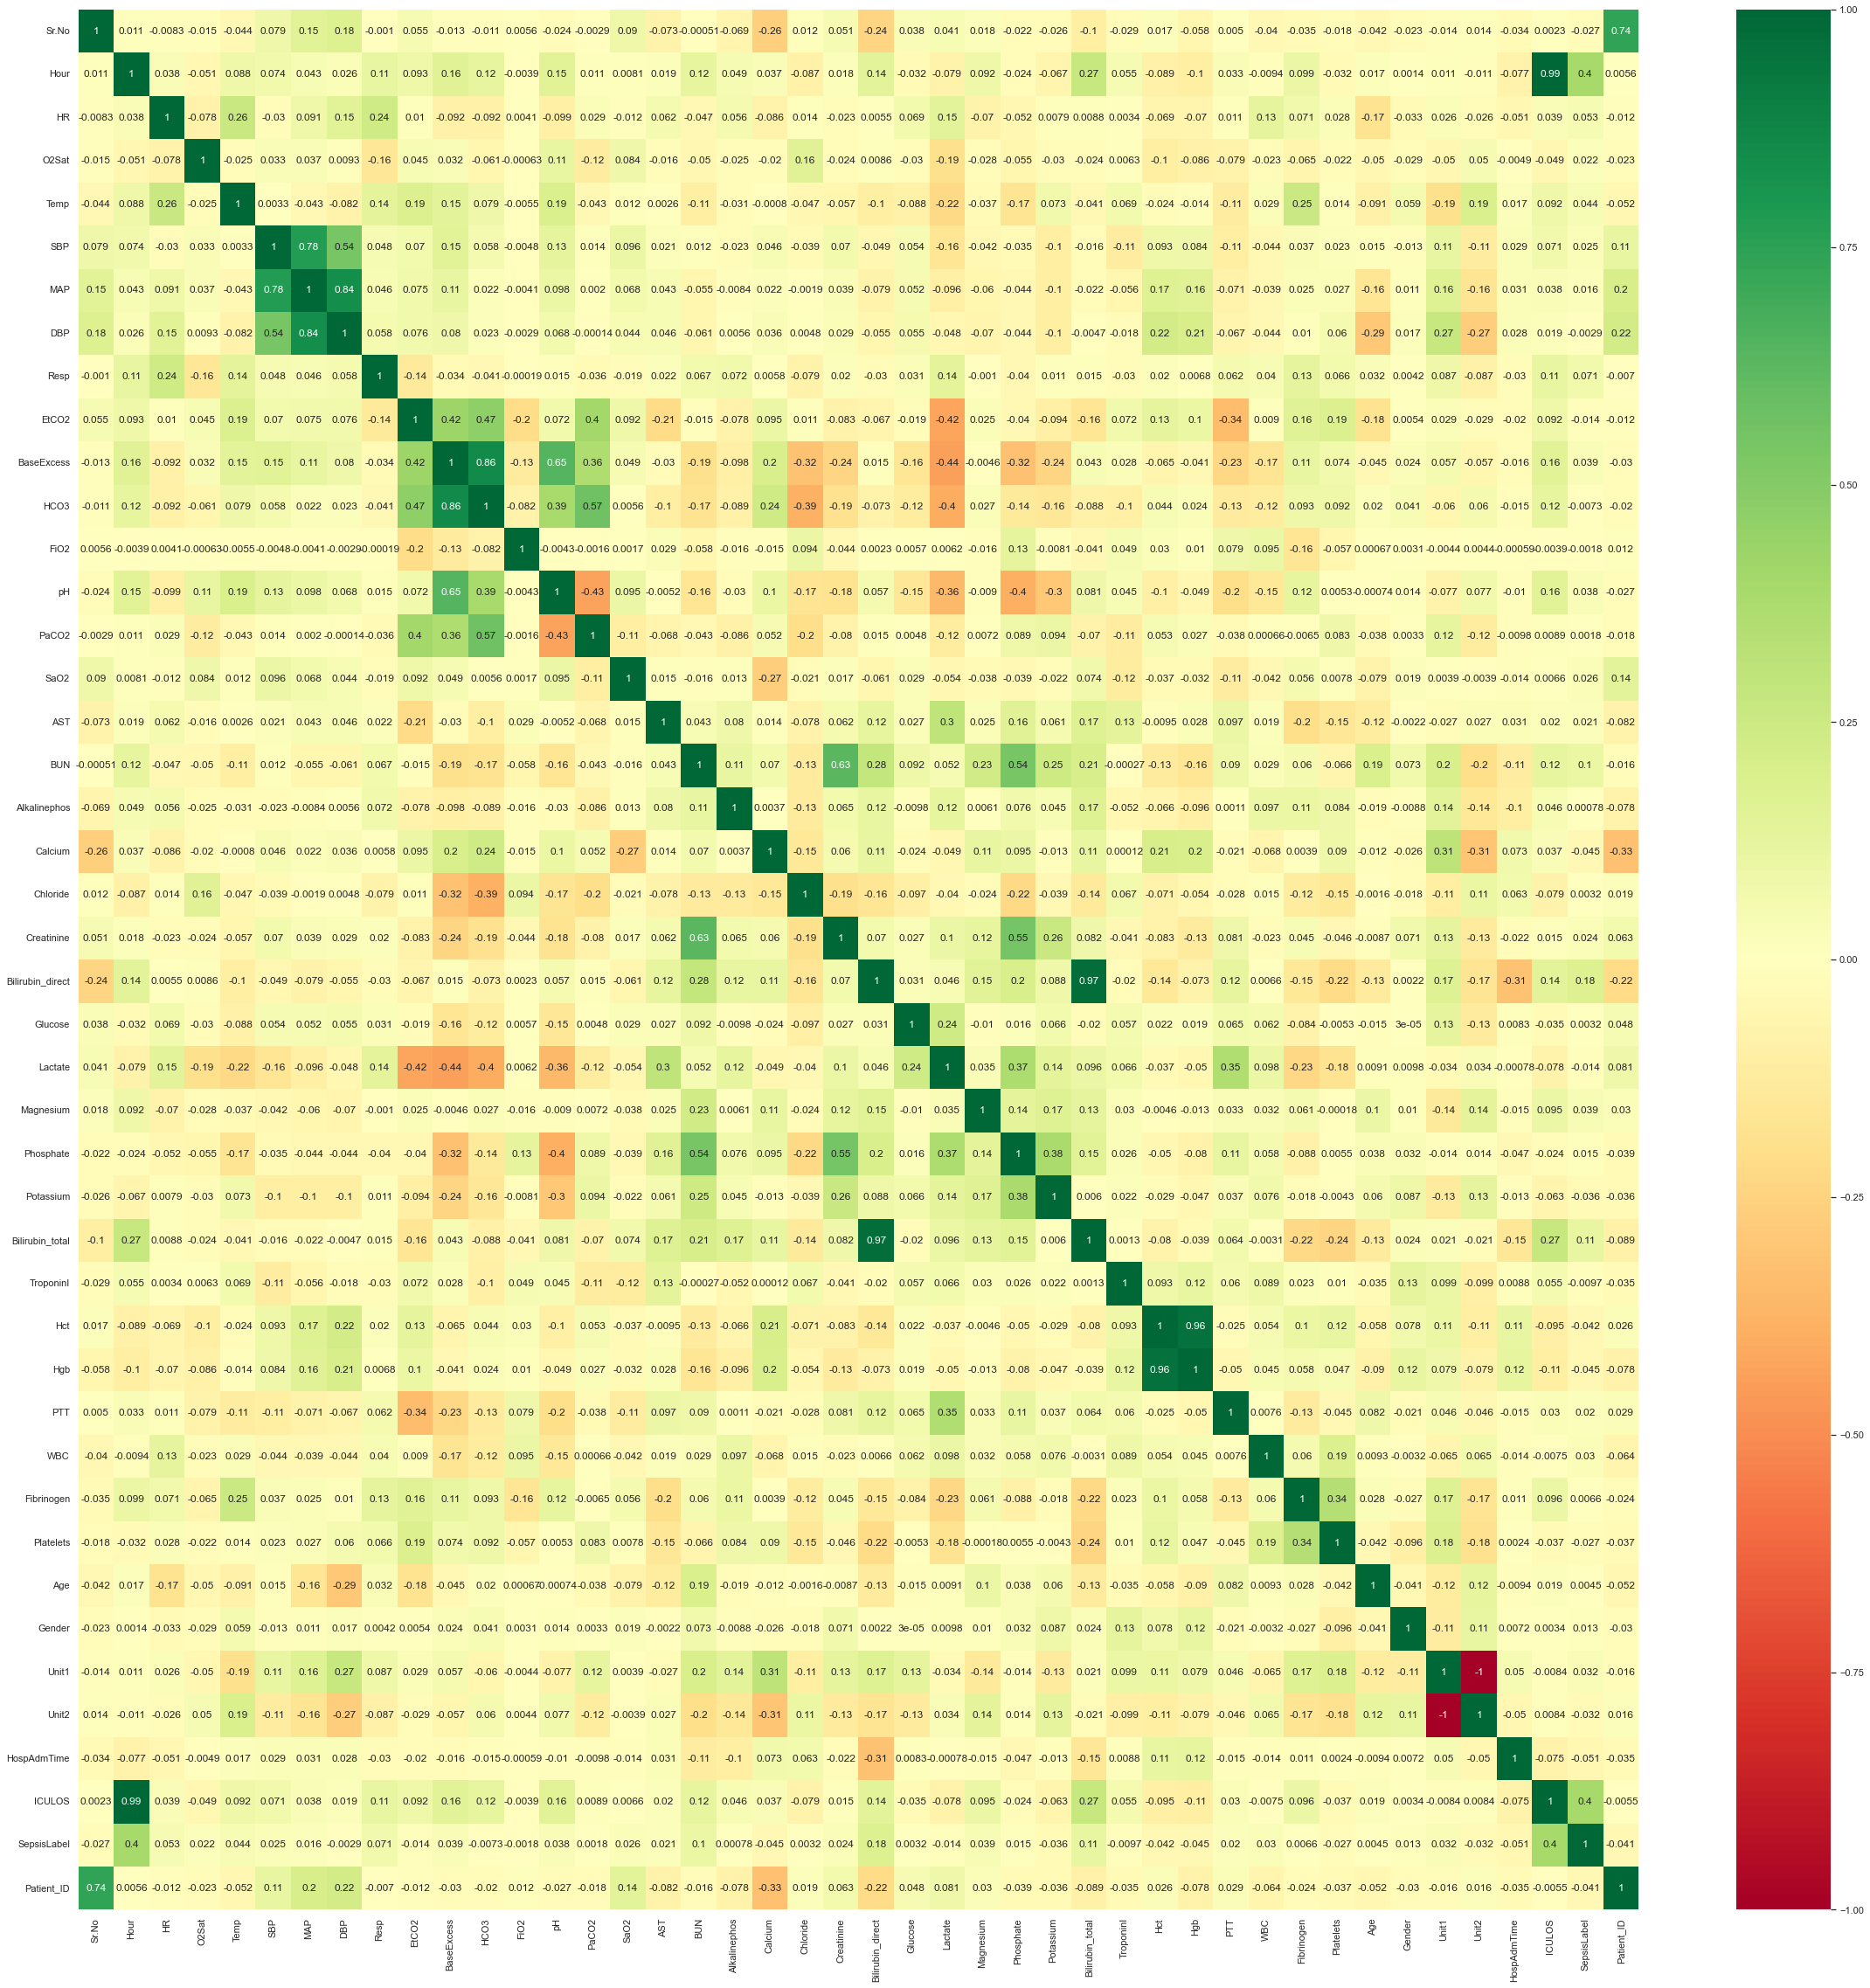

In [36]:
corrmatrix(df)

### FEATURE ENGINEERING

In [37]:
# If 90 or more than 90% data are null then no sence of keeping them hence let's remove them!
# Droping Unit 2 as it's exactly opposite of Unit 1 & no value addition!
# HCT = (RBC x MCV)/10
# hgb=MCV x RBC
# where Mean corpuscular volume (MCV) & red blood cells (RCB)
# Since both hct & hgb depends on MCV & RCB, both are highly corelated,we should use either of them as 
# adding both won't add any more information.
# However, they have highly null values so we can not consider them!
# ICULOS & Hours have almost 1 correlation factor, hence, removig Hours too.

# The relation between MAP,DBP & SBP can be given by following formula!
# MAP = DBP + 1/3(SBP – DBP) or MAP = DBP + 1/3(PBP)
# Hence we don't have to use all SBP,DBP & MAP. We'll use only MAP to reduce dimensions & it'll benifit in terms of
# Storage as well, as we have reduced it by 1/3 from MAP,DBP & SBP.
# 'Patient_ID' is not related with Sepsis it's just number to represent feature,remove it

In [38]:
# Importing file again as we have splited it in test train to vizualize data
# Just to be on safe side
df=pd.read_csv(path)

In [39]:
# Removing featurs with high null values.
X_trainfilter90list=[
 'HR',
 'O2Sat',
 'Temp',
 'MAP',
 'Resp',
 'Age',
 'Gender',
 'Unit1',
 'HospAdmTime',
 'ICULOS']

In [40]:
X_trainfilterby90=df[X_trainfilter90list]

In [41]:
X_trainfilterby90

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,Unit1,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,-0.02,1
1,65.0,100.0,NaN,72.0,16.5,68.54,0,NaN,-0.02,2
2,78.0,100.0,NaN,42.5,NaN,68.54,0,NaN,-0.02,3
3,73.0,100.0,NaN,NaN,17.0,68.54,0,NaN,-0.02,4
4,70.0,100.0,NaN,74.0,14.0,68.54,0,NaN,-0.02,5
...,...,...,...,...,...,...,...,...,...,...
1048570,58.0,92.0,NaN,76.0,16.0,51.00,0,0.0,-324.60,52
1048571,56.0,92.0,NaN,69.0,19.0,51.00,0,0.0,-324.60,53
1048572,61.0,95.0,37.7,77.0,20.0,51.00,0,0.0,-324.60,54
1048573,59.0,95.5,NaN,72.0,22.5,51.00,0,0.0,-324.60,55


In [42]:
# We have 4 critical featurs.
# If HR & Temp are above certain limit then it's problematic thing for us.
# Similarly if O2Sat is below certain limit then it's problematic.
# Resp is problematic if it's too high or too low in general.
# But it's risky if Resp is too low as they have higher probability of Sepsis.

# Based on above information let's create combined featur!
import warnings
warnings.filterwarnings("ignore")

X_trainfilterby90['HrTempO2Resp']= (X_trainfilterby90['HR']* X_trainfilterby90['Temp'])/(X_trainfilterby90['O2Sat']*X_trainfilterby90['Resp'])

In [43]:
# Removing individual features to reduce dimension as we have already captured them in 'HrTempO2Resp' feature.
X_trainfilterby90 = X_trainfilterby90.drop(['HR','Temp','O2Sat','Resp'],axis=1)

In [44]:
X_trainfilterby90

,MAP,Age,Gender,Unit1,HospAdmTime,ICULOS,HrTempO2Resp
0,NaN,68.54,0,NaN,-0.02,1,NaN
1,72.0,68.54,0,NaN,-0.02,2,NaN
2,42.5,68.54,0,NaN,-0.02,3,NaN
3,NaN,68.54,0,NaN,-0.02,4,NaN
4,74.0,68.54,0,NaN,-0.02,5,NaN
...,...,...,...,...,...,...,...
1048570,76.0,51.00,0,0.0,-324.60,52,NaN
1048571,69.0,51.00,0,0.0,-324.60,53,NaN
1048572,77.0,51.00,0,0.0,-324.60,54,1.210368
1048573,72.0,51.00,0,0.0,-324.60,55,NaN


In [45]:
# Let's impute null values with help of interpolate method which seems more logical here,
# By doing so still we found NaN in top rows as they don't have data to interpolate!
# We have imputed them by bfill.

In [46]:
X_trainfilterby90 = X_trainfilterby90.interpolate()
X_trainfilterby90

,MAP,Age,Gender,Unit1,HospAdmTime,ICULOS,HrTempO2Resp
0,NaN,68.54,0,NaN,-0.02,1,NaN
1,72.00,68.54,0,NaN,-0.02,2,NaN
2,42.50,68.54,0,NaN,-0.02,3,NaN
3,58.25,68.54,0,NaN,-0.02,4,NaN
4,74.00,68.54,0,NaN,-0.02,5,NaN
...,...,...,...,...,...,...,...
1048570,76.00,51.00,0,0.0,-324.60,52,1.216914
1048571,69.00,51.00,0,0.0,-324.60,53,1.213641
1048572,77.00,51.00,0,0.0,-324.60,54,1.210368
1048573,72.00,51.00,0,0.0,-324.60,55,1.210368


In [47]:
# Still top null values are there! fill them by bfill
X_trainfilterby90 = X_trainfilterby90.fillna(method='bfill')
X_trainfilterby90

,MAP,Age,Gender,Unit1,HospAdmTime,ICULOS,HrTempO2Resp
0,72.00,68.54,0,1.0,-0.02,1,1.520650
1,72.00,68.54,0,1.0,-0.02,2,1.520650
2,42.50,68.54,0,1.0,-0.02,3,1.520650
3,58.25,68.54,0,1.0,-0.02,4,1.520650
4,74.00,68.54,0,1.0,-0.02,5,1.520650
...,...,...,...,...,...,...,...
1048570,76.00,51.00,0,0.0,-324.60,52,1.216914
1048571,69.00,51.00,0,0.0,-324.60,53,1.213641
1048572,77.00,51.00,0,0.0,-324.60,54,1.210368
1048573,72.00,51.00,0,0.0,-324.60,55,1.210368


In [48]:
# Varifing if we still have null values!
X_trainfilterby90.isnull().sum()*100/len(X_trainfilterby90)

MAP             0.0
Age             0.0
Gender          0.0
Unit1           0.0
HospAdmTime     0.0
ICULOS          0.0
HrTempO2Resp    0.0
dtype: float64

#### Now it felt like we can train model based on these features!

In [49]:
X=X_trainfilterby90[[
    'MAP',
    'Age',
  'Gender',
 'Unit1',
 'HospAdmTime',
 'ICULOS',
'HrTempO2Resp']] 
X

,MAP,Age,Gender,Unit1,HospAdmTime,ICULOS,HrTempO2Resp
0,72.00,68.54,0,1.0,-0.02,1,1.520650
1,72.00,68.54,0,1.0,-0.02,2,1.520650
2,42.50,68.54,0,1.0,-0.02,3,1.520650
3,58.25,68.54,0,1.0,-0.02,4,1.520650
4,74.00,68.54,0,1.0,-0.02,5,1.520650
...,...,...,...,...,...,...,...
1048570,76.00,51.00,0,0.0,-324.60,52,1.216914
1048571,69.00,51.00,0,0.0,-324.60,53,1.213641
1048572,77.00,51.00,0,0.0,-324.60,54,1.210368
1048573,72.00,51.00,0,0.0,-324.60,55,1.210368


In [50]:
# Create output feature for our model.
y=df['SepsisLabel']

In [51]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
#Under Sampling
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_undersample, y_undersample = under_sampler.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split( 
    X_undersample, y_undersample, test_size = 0.3, random_state = 100)

In [53]:
# By doing undersmapling we are creating balance between more 0s present in SepsisLable & all other labels
# However by doing so model's overall accuracy reduced significantly(got 63% for random forest which I have done
# only for random forest which worked best amoung all algotithms) for obvious reason  
# that now we won't have that much training data for 0s.
# However I believe if we have more data which say o/p is 0, then I want my model to
# look at all those data & say o/p is 0. Because for all other classes my model is anyway 
# training by looking at them.
# Conclusion : I want to stick with original data as I got confirmation from validation set results too.

In [54]:

from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split( 
    X, y, test_size = 0.3, random_state = 100)

test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 100)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
print(X_valid.shape), print(y_valid.shape)

(734002, 7)
(734002,)
(157287, 7)
(157287,)
(157286, 7)
(157286,)


(None, None)

In [55]:
# Check for difference of Classes in test & train
print('proportion of classes in training data',len(y_train[y_train==0])/len(y_train[y_train==1]), 
len(y_train[y_train==0])/len(y_train[y_train==6]), 
len(y_train[y_train==0])/len(y_train[y_train==12]) ,
len(y_train[y_train==0])/len(y_train[y_train==14]))

print('proportion of classes in test data',len(y_test[y_test==0])/len(y_test[y_test==1]),
len(y_test[y_test==0])/len(y_test[y_test==6]),
len(y_test[y_test==0])/len(y_test[y_test==12]),
len(y_test[y_test==0])/len(y_test[y_test==14]))

print('proportion of classes in validation data',len(y_valid[y_valid==0])/len(y_valid[y_valid==1]),
len(y_valid[y_valid==0])/len(y_valid[y_valid==6]),
len(y_valid[y_valid==0])/len(y_valid[y_valid==12]),
len(y_valid[y_valid==0])/len(y_valid[y_valid==14]))

proportion of classes in training data 44.06162695152013 85.7624950019992 100.81090396365346 10.372622348313882
proportion of classes in test data 43.98594698179495 87.77565328234544 96.3076923076923 10.249311602292178
proportion of classes in validation data 44.90725675235926 86.25 99.42363112391931 10.434782608695652


In [56]:
# Conclusion:
# Hence we can observe proportion for training, test & validation data, which are almost equal hence we can proceed with this data.

In [57]:
# Scaling the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [58]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=4)
# X_train = lda.fit_transform(X_train, y_train)
X_train_lda=lda.fit(X_train, y_train).transform(X_train)
X_test_lda = lda.transform(X_test)
X_valid_lda = lda.transform(X_valid)

In [59]:
import numpy as np
propotion = lda.explained_variance_ratio_*100
np.round_(propotion,decimals =3)
# We can see almost 98% contribute by 1st component.

array([9.9668e+01, 3.0900e-01, 2.2000e-02, 1.0000e-03])

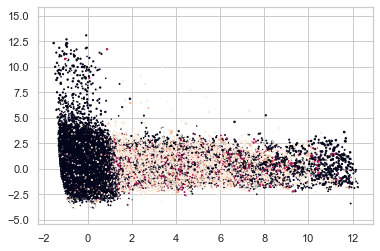

<Figure size 1440x576 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
plt.scatter(X_train_lda[:,0],X_train_lda[:,1],X_train_lda[:,2], c=y_train)
plt.figure(figsize=(20, 8))
plt.show()
# We can see featurs are seperated batter!

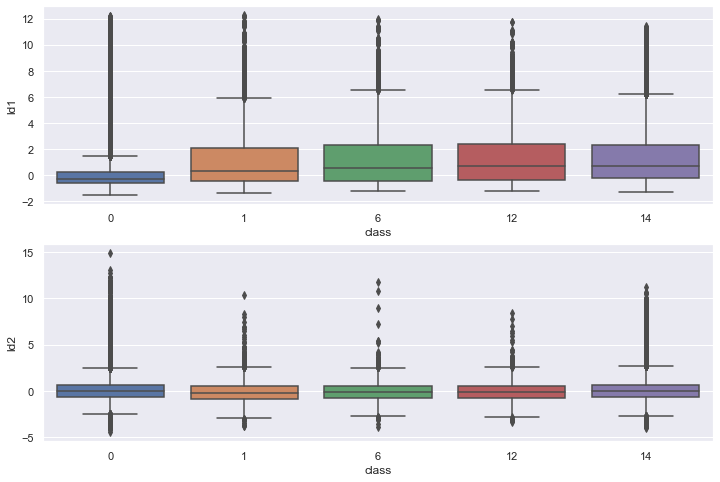

In [61]:
# importing the required module
import seaborn as sns
# creating the dataframe
df1=pd.DataFrame(zip(X_train_lda[:,0],X_train_lda[:,1],y_train),columns=["ld1","ld2","class"])

# setting the size of the image
sns.set(rc={'figure.figsize':(12,8)})

# plotting the graphs
plt.subplot(2,1,1)
sns.boxplot(x='class', y='ld1', data=df1)
plt.subplot(2,1,2)
sns.boxplot(x='class', y='ld2', data=df1)
plt.show()
# Conclusion:
# The below plot shows how the LDA has distributed the dataset based on their target variables in different components. 
# We can also see that classes contain many outliers.

In [62]:
# Although we have done lda above
# We haven't find lda much usefull for any model.
# We have used X_train_lda & y_train_lda to train various models but non of them improved results.
# Hence we are moving ahead without lda only!
# We are not going ahead & showing that X_train_lda & y_train_lda are not giving much better results as we have very large file!

In [63]:
# We are okay with FN as worst we can say person has sepsis & in reality he might not have it.
# But WE DON'T WANT FP as worst in this case person may get sepsis & we are ignoring that!

# WE WANT HIGH PRECISION & LOW RECALL

### Let's Try Various Models

#### KNN

In [64]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

import warnings
warnings.filterwarnings("ignore")

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train_knn = lab.fit_transform(y_train)
y_test_knn = lab.fit_transform(y_test)
# It'll relable (0,1,6,12,14) to (0,1,2,3,4)
#view transformed values
knn = KNeighborsClassifier(n_neighbors=3)
  
knn.fit(X_train, y_train_knn)
y_pred = knn.predict(X_test)
# Predict on dataset which model has not seen before

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_knn, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_knn, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_knn,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[135085    341    141    122   2031]
 [  1666   1063    130     18    254]
 [   812    194    357     98    108]
 [   677     69    142    326    216]
 [  5693    200     92    111   7341]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    137720
           1       0.57      0.34      0.43      3131
           2       0.41      0.23      0.29      1569
           3       0.48      0.23      0.31      1430
           4       0.74      0.55      0.63     13437

    accuracy                           0.92    157287
   macro avg       0.63      0.46      0.52    157287
weighted avg       0.90      0.92      0.91    157287

Accuracy: 91.66173936816139


In [65]:
# KNN Accuracy 0.9225

#### Naive Bayes

In [66]:
# Naive Bayes

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100)

Gaussian Naive Bayes model accuracy(in %): 88.84841086675948
Confusion Matrix:
[[135244    114      0      0   2362]
 [  2178     29      0      0    924]
 [  1089     17      0      0    463]
 [   964     15      0      0    451]
 [  8933     30      0      0   4474]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95    137720
           1       0.14      0.01      0.02      3131
           6       0.00      0.00      0.00      1569
          12       0.00      0.00      0.00      1430
          14       0.52      0.33      0.40     13437

    accuracy                           0.89    157287
   macro avg       0.31      0.26      0.27    157287
weighted avg       0.84      0.89      0.86    157287

Accuracy: 88.84841086675948


In [67]:
# Naive Bayes accuracy 0.8929

#### Decision Tree

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [69]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [70]:
clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", random_state = 100,
        max_depth = 3, min_samples_leaf = 5)

In [71]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [72]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [73]:
y_pred_gini = clf_gini.predict(X_test)

In [74]:
y_pred_entropy = clf_entropy.predict(X_test)

#### Gini Index Results

In [75]:
result1 = classification_report(y_test, y_pred_gini)
confusion_matrix(y_test, y_pred_gini)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_gini)
print("Accuracy:",result2*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    137720
           1       0.00      0.00      0.00      3131
           6       0.00      0.00      0.00      1569
          12       0.00      0.00      0.00      1430
          14       0.63      0.40      0.49     13437

    accuracy                           0.90    157287
   macro avg       0.31      0.28      0.29    157287
weighted avg       0.86      0.90      0.88    157287

Accuracy: 90.40162251171425


#### Entropy Results

In [76]:
result1 = classification_report(y_test, y_pred_entropy)
confusion_matrix(y_test, y_pred_entropy)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_entropy)
print("Accuracy:",result2*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    137720
           1       0.00      0.00      0.00      3131
           6       0.00      0.00      0.00      1569
          12       0.00      0.00      0.00      1430
          14       0.64      0.40      0.49     13437

    accuracy                           0.90    157287
   macro avg       0.31      0.28      0.29    157287
weighted avg       0.86      0.90      0.88    157287

Accuracy: 90.37174083045643


#### Xgboost

In [77]:
# Importing the libraries

# Doing lda redcing accuracy here
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.fit_transform(y_test)
model = XGBClassifier()
model.fit(X_train, y_train_xgb)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_xgb, y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_test_xgb, y_pred)
print(cm)

result1 = classification_report(y_test_xgb, y_pred)
confusion_matrix(y_test_xgb, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_xgb,y_pred)
print("Accuracy:",result2*100)

[[137537     12      1      0    170]
 [  1964    411     18      2    736]
 [   952     65     61     16    475]
 [   820     10     12     28    560]
 [  6945      6      2      5   6479]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    137720
           1       0.82      0.13      0.23      3131
           2       0.65      0.04      0.07      1569
           3       0.55      0.02      0.04      1430
           4       0.77      0.48      0.59     13437

    accuracy                           0.92    157287
   macro avg       0.74      0.33      0.38    157287
weighted avg       0.91      0.92      0.90    157287

Accuracy: 91.8804478437506


In [78]:
#XGB Accuracy 92.3%

#### Random Forest

In [79]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 60)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[137645      3      1      0     71]
 [  1495   1435     94      8     99]
 [   706    145    546    103     69]
 [   564     12     92    530    232]
 [  3379      5      3     40  10010]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    137720
           1       0.90      0.46      0.61      3131
           6       0.74      0.35      0.47      1569
          12       0.78      0.37      0.50      1430
          14       0.96      0.74      0.84     13437

    accuracy                           0.95    157287
   macro avg       0.87      0.58      0.68    157287
weighted avg       0.95      0.95      0.95    157287

Accuracy: 95.4726073992129


In [80]:
# Random Forest With UnderSampling

from sklearn.ensemble import RandomForestClassifier
classifierUS = RandomForestClassifier(n_estimators = 60)
classifierUS.fit(X_train_undersample, y_train_undersample)

y_pred = classifierUS.predict(X_test_undersample)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test_undersample, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_undersample, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_undersample,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[1980  273  152  119  243]
 [ 343 1698  450  136  134]
 [ 163  329 1736  424   68]
 [ 140   83  389 2031  144]
 [ 563  154  135  283 1632]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.66      2767
           1       0.67      0.61      0.64      2761
           6       0.61      0.64      0.62      2720
          12       0.68      0.73      0.70      2787
          14       0.73      0.59      0.65      2767

    accuracy                           0.66     13802
   macro avg       0.66      0.66      0.66     13802
weighted avg       0.66      0.66      0.66     13802

Accuracy: 65.76583103897985


In [81]:
# It's taking too long to train since lack of computation power lead to comment this code for SVM

# from sklearn.svm import SVC
 
# # Building a Support Vector Machine on train data
# svc_model = SVC(C= .1, kernel='linear', gamma= 1)
# svc_model.fit(X_train, y_train)
 
# prediction = svc_model .predict(X_test)
# # check the accuracy on the training set
# print(svc_model.score(X_train, y_train))
# print('Accuracy is ',svc_model.score(X_test, y_test))


### Validation On Best Model

In [82]:
# We found Random Forest as best model based on above matix & results.

In [83]:
# VALIDATION FOR BEST MODEL WE FOUND
# Random Forest

y_pred = classifier.predict(X_valid)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_valid, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[137929      2      0      0     69]
 [  1487   1404     78      7     97]
 [   700    123    632     76     69]
 [   555     11     67    529    226]
 [  3373      3      4     50   9795]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138000
           1       0.91      0.46      0.61      3073
           6       0.81      0.40      0.53      1600
          12       0.80      0.38      0.52      1388
          14       0.96      0.74      0.83     13225

    accuracy                           0.96    157286
   macro avg       0.89      0.59      0.69    157286
weighted avg       0.95      0.96      0.95    157286

Accuracy: 0.9555141589206922


In [84]:
#-----------------------------------------------------------------------------------------------------------------------------#

In [85]:
# To create csv file of o/p which are already sent as SepsisSubmissionValidation.

In [86]:
# Predicting value of o/p for all row(overall dataset) based on our best model which we'll compare with actual 
y_pred_all = classifier.predict(X)

In [100]:
# Importing Pandas to create DataFrame
import pandas as pd

# Creating Empty DataFrame and Storing it in variable df
SepsisSubmissionValidation = pd.DataFrame()

# Printing Empty DataFrame
print(SepsisSubmissionValidation)

Empty DataFrame
Columns: []
Index: []


In [101]:
# Importing Pandas to create DataFrame
import pandas as pd

# Creating Empty DataFrame and Storing it in variable df
SepsisPredictionOnWholeDataset = pd.DataFrame()

# Printing Empty DataFrame
print(SepsisPredictionOnWholeDataset)

Empty DataFrame
Columns: []
Index: []


In [102]:
SepsisPredictionOnWholeDataset['Actual_label_whole_dataset']=y

In [103]:
SepsisPredictionOnWholeDataset['Predicted_lable_whole_dataset']=y_pred_all

In [104]:
SepsisSubmissionValidation['Actual_label_validation']=y_valid

In [105]:
SepsisSubmissionValidation['Predicted_label_validation']=y_pred

In [106]:
SepsisPredictionOnWholeDataset.to_csv('PredictionwholeDataset.csv')

In [107]:
SepsisSubmissionValidation.to_csv('SepsisSubmissionValidationDataset.csv')

In [108]:
# -------------------------------------------------------------------------------------------------------------------------#

In [110]:
#  We considered diffrent approch which is as following.
# We used HistGradientBoostingClassifier to evaluate and compare predictions at different intervals.

In [111]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# Read the data
raw_data = pd.read_csv('Sepsis.csv')
raw_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Get the positive sepsis data
positive_sepsis = raw_data[raw_data.SepsisLabel == 1]

# Get unique patient IDs
positive_patient_ids = positive_sepsis['Patient_ID'].unique()

# Get the number of unique negative patient IDs which are not in the positive sepsis patient IDs
negative_patient_ids = raw_data[~raw_data['Patient_ID'].isin(
    positive_patient_ids)]['Patient_ID'].unique()

#  Randomly select negative patient IDs
negative_patient_ids = np.random.choice(
    negative_patient_ids, 2*positive_patient_ids.shape[0], replace=False)

positive_patient_ids.shape, negative_patient_ids.shape

((2932,), (5864,))

In [114]:
def get_features_at_sepsis_onset(patient_id, raw_data, prediction_interval):
    # Get the patient data
    patient_data = raw_data[raw_data['Patient_ID'] == int(patient_id)]
    # Get the sepsis onset time
    sepsis_onset_time = patient_data[patient_data['SepsisLabel']
                                     == 1].index[0]

    # Check if sepsis onset time -6 hours in the patient data
    if sepsis_onset_time-prediction_interval in patient_data.index:
        # Return the features at sepsis onset - 6 hours
        return patient_data.loc[sepsis_onset_time-prediction_interval]
    else:
        return None


def get_features_for_negative_patient_id(negative_patient_id, raw_data):
    patient_data = raw_data[raw_data['Patient_ID'] == negative_patient_id]
    # Randomly select a time
    random_time = np.random.choice(patient_data.index, 1)[0]
    # Get the features at the random time
    features_at_random_time = patient_data.loc[random_time]
    return features_at_random_time
    
def create_positive_features(positive_patient_ids, raw_data, prediction_threshold=6):
    # Create a dataframe to store the features for positive and negative patient IDs
    features_df_positive = pd.DataFrame()

    # Get the features for positive patient IDs
    for positive_patient_id in positive_patient_ids:
        features = get_features_at_sepsis_onset(
            positive_patient_id, raw_data, prediction_threshold)
        if features is None:
            continue
        features['SepsisLabel'] = 1
        features_df_positive = features_df_positive.append(
            features, ignore_index=True)
    return features_df_positive


def create_negative_features(negative_patient_ids, raw_data):
    # Get the features for negative patient IDs
    features_df_negative = pd.DataFrame()

    for negative_patient_id in negative_patient_ids:
        features = get_features_for_negative_patient_id(
            negative_patient_id, raw_data)
        features['SepsisLabel'] = 0
        features_df_negative = features_df_negative.append(
            features, ignore_index=True)
    return features_df_negative


In [115]:
def get_HistGradient_result(X_train, X_test, y_train, y_test):
    # Create the model
    model = HistGradientBoostingClassifier()

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the test data
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate the precision
    precision = precision_score(y_test, y_pred)

    # Calculate the recall
    recall = recall_score(y_test, y_pred)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)

    # Calculate the ROC AUC score
    rocauc = roc_auc_score(y_test, y_pred)

    # Calculate the log loss
    logloss = log_loss(y_test, y_pred)

    # Print the results
    print('Accuracy: ', accuracy)
    print('Confusion matrix: ', conf_matrix)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 score: ', f1)
    print('ROC AUC score: ', rocauc)
    return accuracy, precision, recall, f1, rocauc, logloss, conf_matrix


Accuracy:  0.8320097739767868
Confusion matrix:  [[1122   47]
 [ 228  240]]
Precision:  0.8362369337979094
Recall:  0.5128205128205128
F1 score:  0.6357615894039734
ROC AUC score:  0.7363076045710776
Accuracy:  0.8183508989460633
Confusion matrix:  [[1069   54]
 [ 239  251]]
Precision:  0.8229508196721311
Recall:  0.5122448979591837
F1 score:  0.6314465408805031
ROC AUC score:  0.7320797063259855
Accuracy:  0.8393977415307403
Confusion matrix:  [[1139   37]
 [ 219  199]]
Precision:  0.8432203389830508
Recall:  0.47607655502392343
F1 score:  0.6085626911314985
ROC AUC score:  0.722306984994955
Accuracy:  0.8350253807106599
Confusion matrix:  [[1095   47]
 [ 213  221]]
Precision:  0.8246268656716418
Recall:  0.5092165898617511
F1 score:  0.6296296296296297
ROC AUC score:  0.734030361480788
Accuracy:  0.848814862267777
Confusion matrix:  [[1127   45]
 [ 191  198]]
Precision:  0.8148148148148148
Recall:  0.5089974293059126
F1 score:  0.6265822784810127
ROC AUC score:  0.7353007624345262
Ac

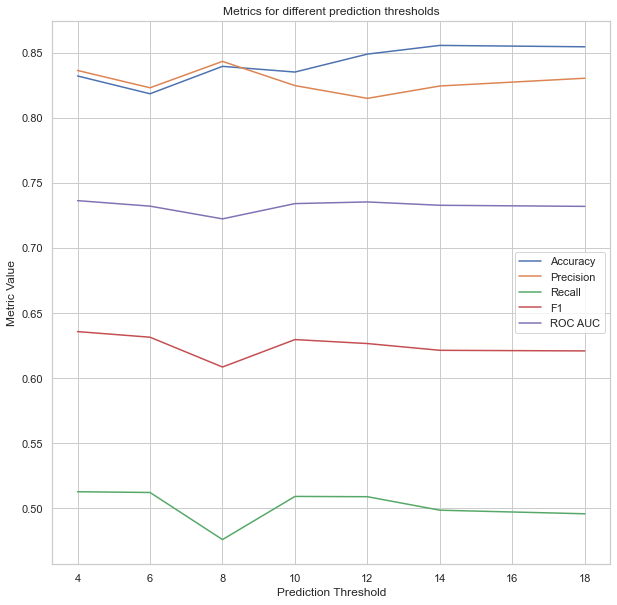

In [116]:
# thresholds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
thresholds = [4, 6, 8, 10, 12, 14, 18]
output = []

features_df_negative = create_negative_features(negative_patient_ids, raw_data)

for threshold in thresholds:
    features_df_positive = create_positive_features(
        positive_patient_ids, raw_data, prediction_threshold=threshold)
    features_df = pd.concat(
        [features_df_positive, features_df_negative.iloc[:positive_patient_ids.shape[0]]], axis=0)
    features_df.drop(['ICULOS', 'Patient_ID'], axis=1, inplace=True)

    X = features_df.drop(['SepsisLabel'], axis=1)
    y = features_df['SepsisLabel']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    accuracy, precision, recall, f1, rocauc, logloss, conf_matrix = get_HistGradient_result(
        X_train, X_test, y_train, y_test)

    output.append([threshold, accuracy, precision, recall,
                  f1, rocauc, logloss, conf_matrix])

#  Plot the results for different thresholds
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
plt.plot([i[0] for i in output], [i[1] for i in output], label='Accuracy')
plt.plot([i[0] for i in output], [i[2] for i in output], label='Precision')
plt.plot([i[0] for i in output], [i[3] for i in output], label='Recall')
plt.plot([i[0] for i in output], [i[4] for i in output], label='F1')
plt.plot([i[0] for i in output], [i[5] for i in output], label='ROC AUC')
plt.legend()
plt.xlabel('Prediction Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics for different prediction thresholds')
plt.show()


In [118]:
# We see that F1 scores decreases as the prediction interval increases, though we see a spike in F1 around 10,
# it could be due to random down sampling of dataset. The F1 score at sepsis onset - 6hrs is 0.6314465408805031 and 
# sepsis onset - 12hrs is 0.6265822784810127

In [ ]:
#----------------------------------------THANK YOU---------------------------------------------------------------------------#